# Sensitivity estimate example

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


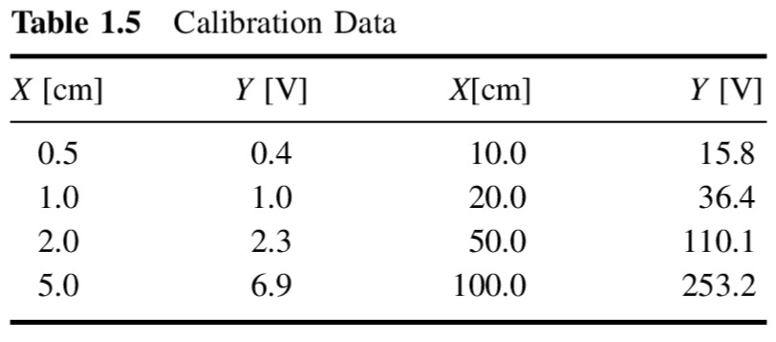

In [19]:
import numpy as np
import matplotlib.pyplot as pl
%pylab inline

from IPython.core.display import Image 
Image(filename='img/sensitivity_error_example.png',width=400) 

In [20]:
x = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
y = np.array([0.4, 1.0, 2.3, 6.9, 15.8, 36.4, 110.1, 253.2])

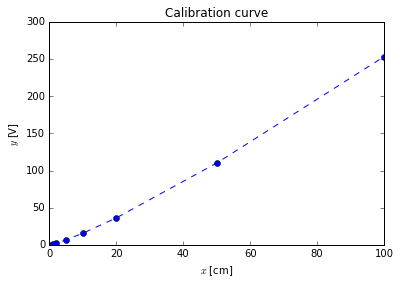

In [21]:
pl.plot(x,y,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Calibration curve')

Sensitivity, $K$ is:

$ K_i  = \left( \frac{\partial y}{\partial x} \right)_{x_i} $

In [22]:
K = np.diff(y)/np.diff(x)
print K

[ 1.2         1.3         1.53333333  1.78        2.06        2.45666667
  2.862     ]


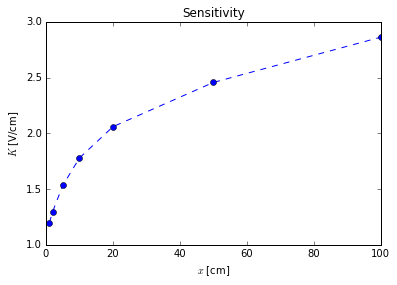

In [23]:
pl.plot(x[1:],K,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Sensitivity')

Instead of working with non-linear curve of sensitivity we can use the usual trick: the logarithmic scale

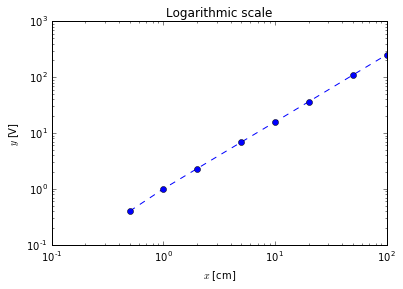

In [24]:
pl.loglog(x,y,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')

[ 1.32192809  1.20163386  1.19897785  1.19525629  1.20401389  1.20793568
  1.20146294]


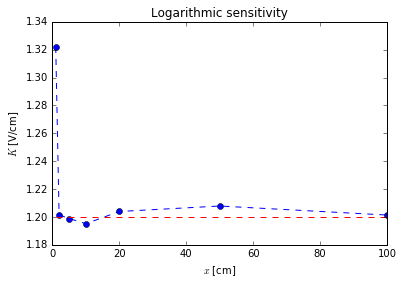

In [25]:
logK = np.diff(np.log10(y))/np.diff(np.log10(x))
print logK
pl.plot(x[1:],logK,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Logarithmic sensitivity')
pl.hold(True)
pl.plot([x[1],x[-1]],[1.2,1.2],'r--')

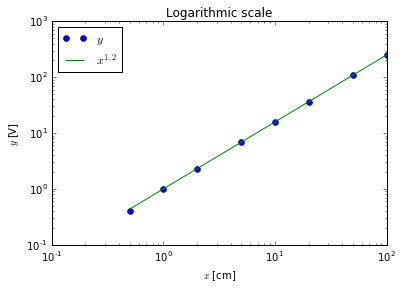

In [26]:
pl.loglog(x,y,'o',x,x**(1.2))
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

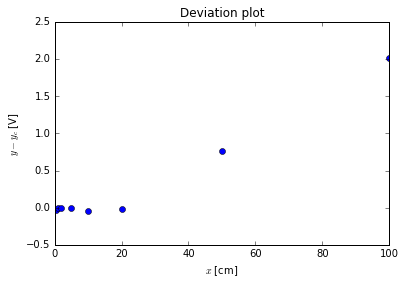

In [27]:
pl.plot(x,y-x**(1.2),'o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y - y_c$ [V]')
pl.title('Deviation plot')
# pl.legend(('$y$','$x^{1.2}$'),loc='best')

## Regression analysis
Following the recipe of http://www.answermysearches.com/how-to-do-a-simple-linear-regression-in-python/124/

In [28]:
from math import sqrt
def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    if len(X) != len(Y):  raise ValueError, 'unequal length'
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in map(None, X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    a, b = (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det
    meanerror = residual = 0.0
    for x, y in map(None, X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
    RR = 1 - residual/meanerror
    ss = residual / (N-2)
    Var_a, Var_b = ss * N / det, ss * Sxx / det
    #print "y=ax+b"
    #print "N= %d" % N
    #print "a= %g \\pm t_{%d;\\alpha/2} %g" % (a, N-2, sqrt(Var_a))
    #print "b= %g \\pm t_{%d;\\alpha/2} %g" % (b, N-2, sqrt(Var_b))
    #print "R^2= %g" % RR
    #print "s^2= %g" % ss
    return a, b, RR

In [29]:
print linreg(np.log10(x),np.log10(y))

(1.2103157469888082, -0.012527809481276199, 0.99988882473421792)


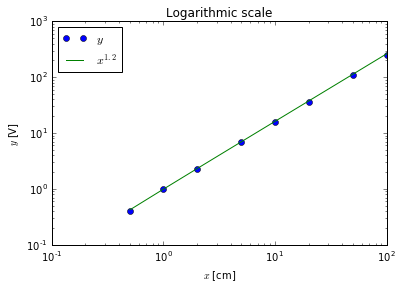

In [33]:
pl.loglog(x,y,'o',x,x**(1.21)-0.01252)
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

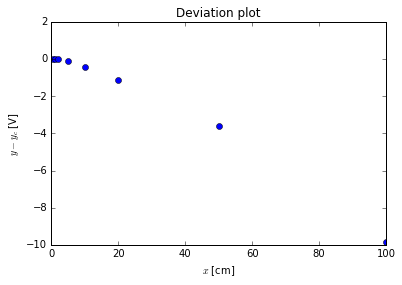

In [37]:
pl.plot(x,y-(x**(1.21)-0.01252),'o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y - y_c$ [V]')
pl.title('Deviation plot')
# pl.legend(('$y$','$x^{1.2}$'),loc='best')